# FAIRe Qualitäts-KPIs
Autor: Dennis Dibbern  
Datum: 23.10.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:


Forschungsfrage: Wie kostengünstig und einfach im Aufbau kann man ein Lego-Auto gestalten, welches trotzdem seine Funktion der Fortbewegung erfüllt? Wie viel wiegt dieses Fahrzeug? Erfüllt es genug Kriterien, um auch Akzeptanz zu haben?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Mein Ziel des Versuchs ist es, möglichst wenig Geld für das erste Fahrzeug auszugeben. Es soll einfach aufgebaut sein und dennoch seine Funktion erfüllen.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![Erstes Fahrzeug](figures/Screenshot_Fahrzeug1.png)

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Das Fahrzeug ist klein und kompakt. Es enthält wenige und kostengünstige Bauteile, was es günstig und leicht macht. Das Batteriepaket ist zwar groß, war aber mit Abstand das günstigste, weshalb ich es für dieses Auto ausgewählt habe. 

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [1]:
import json
import pprint
from functions import calculation_rules
from functions.classes import *

In [2]:
# initialize components
#axles
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
    
#create front axle
front_axle1 = LegoComponent("front axle", axles["23948"]);

#create back axle
back_axle1 = LegoComponent("back axle", axles["23948"]);

#transmission axles
#top
transmission_axle_top1 = LegoComponent("transmission_axle_top", axles["32073"]);

#bottom
transmission_axle_bottom1 = LegoComponent("transmission_axle_bottom", axles["44294"]);

#wheels
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
front_wheel_right1 = LegoComponent("front wheel right", wheels["3482c01"]);
front_wheel_left1 = LegoComponent("front wheel left", wheels["3482c01"]);
back_wheel_right1 = LegoComponent("back wheel right", wheels["3482c01"]); 
back_wheel_left1 = LegoComponent("back wheel left", wheels["3482c01"]);

#frame
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
bottom_frame1 = LegoComponent("bottom frame", frame["32532"]);
top_frame1 = LegoComponent("top frame", frame["32532"]);

#gears
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
top_gear1 = LegoComponent("top gear", gears["94925"]);
middle_gear1 = LegoComponent("middle gear", gears["94925"]);
bottom_gear1 = LegoComponent("bottom gear", gears["3647"]);

#motor
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
motor1 = LegoComponent("motor", motors["8883-1"]);

#battery
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
battery1 = LegoComponent("battery", batteries["2847c01"]);


In [3]:
# set properties
# set colors of wheels
front_wheel_right1.properties["color"] = "Bright Green";
front_wheel_left1.properties["color"] = "Bright Green";
back_wheel_right1.properties["color"] = "Bright Green";
back_wheel_left1.properties["color"] = "Bright Green";

In [4]:
# aggregate components

#assemble fahrwerk
fahrwerk_car1_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "fahrwerk assembly", assembly_method="stick together like lego blocks")
fahrwerk_car1_assembly.add([front_wheel_right1, front_wheel_left1, front_axle1, back_wheel_right1, back_wheel_left1, back_axle1])

#assemble chassis
chassis_car1_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "chassis assembly", assembly_method="stick together like lego blocks")
chassis_car1_assembly.add([top_frame1, bottom_frame1])

#assemble powertrain
powertrain_car1_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "powertrain assembly", assembly_method="stick together like lego blocks")
powertrain_car1_assembly.add([motor1, battery1, top_gear1, middle_gear1, bottom_gear1, transmission_axle_top1, transmission_axle_bottom1])

# assemble car
car_1 = LegoAssembly(AggregationLayer.SYSTEM, "car 1",assembly_method="stick together like lego blocks", manufactorer="Dennis Dibbern")
car_1.add([fahrwerk_car1_assembly, chassis_car1_assembly, powertrain_car1_assembly])


#pprint.pprint(car_1.get_component_list());
print_assembly_tree(car_1)

LegoAssembly car 1 [93b1a50d-c6e3-41c8-b074-ac0399c5f5eb]
├── LegoAssembly fahrwerk assembly [7fbed136-c977-485c-817b-d5213c6d595d]
│   ├── LegoComponent front wheel right [18148da6-de7c-49a4-8bc4-29fe1d371650]
│   ├── LegoComponent front wheel left [e7b2e4b3-7161-42fd-ac38-b3a24c4c810c]
│   ├── LegoComponent front axle [17bb9a80-549b-4640-9c95-cda1a8c069c2]
│   ├── LegoComponent back wheel right [7cba0aa9-a635-462b-852b-6bc2a30f9fbd]
│   ├── LegoComponent back wheel left [0f930465-9646-472d-a0cb-cd7e4fbb2e09]
│   └── LegoComponent back axle [6a0d1d49-72ff-4eea-8a8b-610274c24184]
├── LegoAssembly chassis assembly [840d2162-aadc-4ca3-9de4-96ed050d9559]
│   ├── LegoComponent top frame [4aa5390f-633c-4125-ad63-fa9073dd0476]
│   └── LegoComponent bottom frame [24b27e15-3f9d-486d-91c4-2409c1f7465f]
└── LegoAssembly powertrain assembly [1b25cbcc-88da-4138-b030-8e66cd425eca]
    ├── LegoComponent motor [5dd81bd1-cb47-424d-bfca-0f0defe77760]
    ├── LegoComponent battery [b92bad59-e03e-45e7-b3

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
KPI\,Masse: m = \sum_{j=0}^{m} Massen\,der\,Komponenten
$$

$$
KPI\,Preis: Preis = \sum_{j=0}^{m} Preise\,der\,Komponenten
$$

$$
KPI\,Maximale\,Lieferzeit: Lieferzeit= \max (Lieferzeit\,der\,Komponenten)
$$

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [5]:
# calculate the KPIs for your car

#calculation_rules.test_function()
mass_1 = calculation_rules.kpi_mass(car_1)
price_1 = calculation_rules.kpi_price(car_1)
delivery_time_1 = calculation_rules.kpi_delivery_time(car_1)

#add KPIs to vehicle
car_1.properties["KPI mass"] = mass_1
car_1.properties["KPI price"] = price_1
car_1.properties["KPI delivery time"] = delivery_time_1

In [6]:
# print your KPIs

print("Gesamtmasse: ", mass_1, "g")
print("Gesamtpreis:", price_1, "Euro")
print("Maximale Lieferzeit:", delivery_time_1, "Tage")

Gesamtmasse:  242.26999999999998 g
Gesamtpreis: 23.251 Euro
Maximale Lieferzeit: 12 Tage


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [7]:
# export car and its properties
with open("car_1.json", "w") as fp:
    json.dump(car_1.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Mein Ziel für das zweite Fahrzeug ist eine erhöhte Akzeptanz durch unter anderem ansprechenderes Design, sowie eine Verbesserung hinsichtlich Nachhaltigkeit. Das Fahrzeug soll trotzdem nicht zu teuer werden (Akzeptanz) und möglichst leicht bleiben. Es geht also darum, das Fahrzeug allegmein zu verbessern, um von der Qualitätsdimension (wenig) Aufwand zu einem Kompromiss zu kommen, der auch die Bereiche Akzeptanz und allgemein Nachhaltigkeit mit einbindet.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![Zweites Fahrzeug](figures/Screenshot_Fahrzeug2.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Das zweite Fahrzeug ist optisch deutlich ansprechender, da alle Komponenten auf bzw. in dem Fahrzeug Platz finden. Es ist größrt als das erste Fahrzeug und beispielsweise die Baugruppen "Räder" sind besser gesichert, was zwar das Gewicht und den Preis erhöhnt, jedoch auch für eine höhrere Sicherheit und eine schönere Optik (also auch Akzeptanz) sorgt.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [8]:
# initialize components

with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
    
#create front axle
front_axle2 = LegoComponent("front axle", axles["3708"]);

#create back axle
back_axle2 = LegoComponent("back axle", axles["3708"]);

#create motor axle
motor_axle2 = LegoComponent("motor axle", axles["32073"]);

#create transmission holding axles
transmission_axle_back2 = LegoComponent("transmission axle back", axles["44294"])
transmission_axle_front2 = LegoComponent("transmission axle front", axles["44294"])

#frame
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)

#create technic bushs for stabilising axles in frame
bush_front_axle_right2 = LegoComponent("bush front axle right", frame["32123"])
bush_front_axle_left2 = LegoComponent("bush front axle left", frame["32123"])
bush_back_axle_right2 = LegoComponent("bush back axle right", frame["32123"])
bush_back_axle_left2 = LegoComponent("bush back axle left", frame["32123"])
bush_front_transmission_axle_right2 = LegoComponent("bush front transmission axle right", frame["32123"])
bush_front_transmission_axle_left2 = LegoComponent("bush front transmission axle left", frame["32123"])
bush_back_transmission_axle_right2 = LegoComponent("bush back transmission axle right", frame["32123"])
bush_back_transmission_axle_left2 = LegoComponent("bush back transmission axle left", frame["32123"])

#create chassis parts
chassis_front2 = LegoComponent("chassis front", frame["32532"])
chassis_middle2 = LegoComponent("chassis middle", frame["32532"])
chassis_back2 = LegoComponent("chassis back", frame["32532"])

#create chassis connector
pin_back_right2 = LegoComponent("pin back right", frame["3673"])
pin_back_middle2 = LegoComponent("pin back middle", frame["3673"])
pin_back_left2 = LegoComponent("pin back left", frame["3673"])

pin_front_right2 = LegoComponent("pin front right", frame["32556"])
pin_front_middle2 = LegoComponent("pin front middle", frame["32556"])
pin_front_left2 = LegoComponent("pin front left", frame["32556"])

#create motor stabilisation
motor_stabilisation2 = LegoComponent("motor stabilisation", frame["3701"])

# create wheels
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
front_wheel_right2 = LegoComponent("front wheel right", wheels["56904c02"]);
front_wheel_left2 = LegoComponent("front wheel left", wheels["56904c02"]);
back_wheel_right2 = LegoComponent("back wheel right", wheels["56904c02"]); 
back_wheel_left2 = LegoComponent("back wheel left", wheels["56904c02"]);

#create gears
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
gear_worm2 = LegoComponent("gear worm", gears["4716"]);
gearbox2 = LegoComponent("gearbox", gears["6588"]);
gear2 = LegoComponent("gear", gears["3648"]);

#create motor
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
motor2 = LegoComponent("motor", motors["8883-1"]);

#create battery
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
battery2 = LegoComponent("battery", batteries["8878-1"]);


In [9]:
# set properties
front_wheel_right2.properties["color"] = "Bright Green";
front_wheel_left2.properties["color"] = "Bright Green";
back_wheel_right2.properties["color"] = "Bright Green";
back_wheel_left2.properties["color"] = "Bright Green";

In [10]:
# aggregate components
#assemble fahrwerk
fahrwerk_car2_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "fahrwerk assembly", assembly_method="stick together like lego blocks")
fahrwerk_car2_assembly.add([front_wheel_right2, front_wheel_left2, front_axle2, back_wheel_right2, back_wheel_left2, back_axle2, bush_front_axle_right2,bush_front_axle_left2, bush_back_axle_right2, bush_back_axle_left2])

#assemble chassis
chassis_car2_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "chassis assembly", assembly_method="stick together like lego blocks")
chassis_car2_assembly.add([chassis_front2, chassis_middle2, chassis_back2, pin_back_right2, pin_back_middle2,pin_back_left2, pin_front_right2, pin_front_middle2, pin_front_left2, motor_stabilisation2])

#assemble powertrain
powertrain_car2_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "powertrain assembly", assembly_method="stick together like lego blocks")
powertrain_car2_assembly.add([motor2, battery2])

#assemble transmission
transmission_car2_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "transmission assembly", assembly_method="stick together like lego blocks")
transmission_car2_assembly.add([motor_axle2, transmission_axle_back2, transmission_axle_front2, bush_front_transmission_axle_right2,bush_front_transmission_axle_left2, bush_back_transmission_axle_right2,bush_back_transmission_axle_left2, gear_worm2, gearbox2, gear2])

# assemble car
car_2 = LegoAssembly(AggregationLayer.SYSTEM, "car 2",assembly_method="stick together like lego blocks", manufactorer="Dennis Dibbern")
car_2.add([fahrwerk_car2_assembly, chassis_car2_assembly, powertrain_car2_assembly, transmission_car2_assembly])


#pprint.pprint(car_2.get_component_list());
print_assembly_tree(car_2)

LegoAssembly car 2 [24631be7-5498-4613-a8de-bbd916d96f0f]
├── LegoAssembly fahrwerk assembly [83879258-a133-4761-b2ad-1ef37503faa4]
│   ├── LegoComponent front wheel right [03777b3b-62eb-41b4-8e33-e6dc282a2e00]
│   ├── LegoComponent front wheel left [e6d4c253-2571-485a-bfb2-c38e6b502bc0]
│   ├── LegoComponent front axle [519af3d5-2274-4822-9235-b229258ab5a5]
│   ├── LegoComponent back wheel right [7e660896-91f9-4961-ae61-2cdb0645023a]
│   ├── LegoComponent back wheel left [7a65cc0b-c126-4e3d-bb35-8430be7f75fc]
│   ├── LegoComponent back axle [e27951de-51a6-4a8a-83e3-9b86e69a848e]
│   ├── LegoComponent bush front axle right [be15e6d7-bc39-4953-971c-733362cbe9cb]
│   ├── LegoComponent bush front axle left [0a4077db-e9d1-4a2d-8957-81f2fce47685]
│   ├── LegoComponent bush back axle right [4637e6df-34c8-46d1-8694-6d45e5c3a9b7]
│   └── LegoComponent bush back axle left [4bb5d57f-5c14-4b12-bb5e-223ff1ad0b3c]
├── LegoAssembly chassis assembly [218c6672-3e6b-40d5-b6e2-a804876e2ba0]
│   ├── Lego

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [11]:
# calculate the KPIs for your car
mass_2 = calculation_rules.kpi_mass(car_2)
price_2 = calculation_rules.kpi_price(car_2)
delivery_time_2 = calculation_rules.kpi_delivery_time(car_2)

#add KPIs to vehicle
car_2.properties["KPI mass"] = mass_2
car_2.properties["KPI price"] = price_2
car_2.properties["KPI delivery time"] = delivery_time_2

In [12]:
# print your KPIs
print("Gesamtmasse: ", mass_2, "g")
print("Gesamtpreis:", price_2, "Euro")
print("Maximale Lieferzeit:", delivery_time_2, "Tage")

Gesamtmasse:  210.37999999999994 g
Gesamtpreis: 78.95100000000004 Euro
Maximale Lieferzeit: 12 Tage


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [13]:
# export car and its properties
with open("car_2.json", "w") as fp:
    json.dump(car_1.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

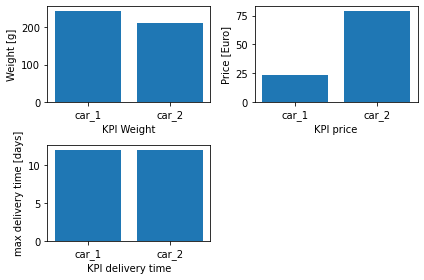

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the data, save diagramm as svg-file
#import python plot library
import matplotlib.pyplot as plt
fig = plt.figure()

xwerte = ["car_1", "car_2"]

#plot for KPI weight
plt.subplot(221)
ywerte_weight = [mass_1, mass_2]
plt.bar(xwerte, ywerte_weight)
plt.xlabel("KPI Weight")
plt.ylabel("Weight [g]")

#Plot for KPI price
plt.subplot(222)
ywerte_price = [price_1, price_2]
plt.bar(xwerte, ywerte_price)
plt.xlabel("KPI price")
plt.ylabel("Price [Euro]")

#plot for KPI delivery time
plt.subplot(223)
ywerte_delivery_time = [delivery_time_1, delivery_time_2]
plt.bar(xwerte, ywerte_delivery_time)
plt.xlabel("KPI delivery time")
plt.ylabel("max delivery time [days]")

fig.tight_layout()
plt.show()

plt.savefig("KPI_plot.svg");

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Wie man sehen kann, konnte ich meine Ziele weitgehend erreichen. Das Gewicht hat entgegen meiner Erwartungen sogar abgenommen, was auf das kleinere (aber dafür aufladbare) Batteriepaket zurückzuführen ist. Dies ist sehr positiv im Blick auf die Nachhaltigkeit des zweiten Fahrzeugs, da hiermit auch von einem geringeren Energieverbrauch ausgegangen werden kann. 
Die Lieferzeit ist gleich geblieben, was trotz der höhreren Komplexität zumindest nichts an der Verfügbarkeit ändert. 
Der Preis ist leider ungefähr um den Faktor 3 angestiegen, was auch auf das bessere Batteriepaket zurückzuführen ist. Das ist zwar ein sehr starker Anstieg, welcher aber durch den aufladbaren Akku, sowie das ansprechendere und stabilere Design gerechtfertigt ist. 
Die Qualität des zweiten Fahrzeugs ist durch viele Faktoren höher als die des ersten Fahrzeugs. Dazu zählen unter anderem eine bessere Sicherung der Achsen und ein aufwändigeres Getriebe (Schneckengetriebe), was aber einen deutlich ruhigeren und gleichmäßigeren Lauf des Fahrzeugs erfüllt. Daher sehe ich den höheren Preis auch als gerechtfertigt.

Zusammengefasste Qualitätsdimensionen:
1. Der _Aufwand_ ist beim zweiten Fahrzeug größer geworden, bleibt jedoch von den Kosten und der Teilenazahl trotzdem in einem vertretbaren Bereich. Außerdem ist durch das geringere Gewicht der Energieverbrauch gesunken, was im Bereich Nachhaltigkeit und sozialem Impact eine wichtige Rolle spielt.
2. Die _Verfügbarkeit_ ist gleich geblieben (Lieferzeit).
3. Die _Akzeptanz_ (am schwierigsten zu quantifizierende Größe) ist stark angestiegen, vor allem durch das gesunkene Gewicht des zweiten Fahrzeugs. Dazu kommt der oben beschriebene ruhigere Lauf, was für eine positivere Nutzererfahrung sorgen wird.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Meine entwickelten KPIs lauten "Gewicht", "Lieferzeit" und "Preis". 

_Findable_ sind die Daten problemlos, da jedes verwendete Teile seinen eigenen Namen und eine eigene UIID hat. Somit kann man die Fahrzeugdaten einfach nach konkreten Wünschen durchsuchen. Außerdem enthalten die Daten aussagekräftige Metadaten, die eine zielgerichtete Suche nach konkreten Daten ermöglichen.

_Accessable_ sind die Daten grundsätzlich auch, da LeoCAD eine open-source Software ist, und alle Informationen zu den Bauteilen im Internet frei zugänglich sind. 

_Interoperable_ sind die Daten auch, da Python eine sehr universelle Programmiersprache ist und die exportierten json Dateien sowohl für Mensch als auch für Maschine lesbar sind.

_Reusable_ sind meine KPIs auch, da die Rechenvorschriften in der Datei calculation_rules festgehalten sind, und man jedes weitere aus den gegebenen Legoteilen gebaute Objekt damit analysieren könnte.

Somit würde ich die entwickelten KPIs als FAIR bezeichnen.



## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Zusammengefasst kann ich sagen, dass mir das Projekt Spaß gemacht hat. Es hat zwar lange gedauert, sich in alle genutzten Programme wie Git und Jupiter einzuarbeiten und sich zurechtzufinden, jedoch hat das am Ende doch gut funktioniert.
Ich habe einen neuen Umgang mit Daten und Metadaten gelernt und finde es beeindruckend, wie man damit relativ schnell Vergleiche zwischen zwei Objekten durchführen kann. 
Vor allem habe ich aber, wie bereits erwähnt, gelernt, wie man sich in den genutzten Programmen zurechtfindet und sich in solche neuen Themen einarbeitet. 